Problem statement: The client wants to invest in the Cab industry.

Project delivery:  Provide analysis on recommendation the most suitable investement.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
import seaborn as sns
import missingno as msno
warnings.filterwarnings('ignore') # Turn off warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


# Data Set provided:

Time period: 31/01/2016 to 31/12/2018.

* Cab_Data.csv – details of transaction for 2 cab companies

* Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

* Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

* City.csv – this file contains list of US cities, their population and number of cab users

In [194]:
import pandas as pd
cab = pd.read_csv("Cab_Data.csv")
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [195]:
cab.columns=cab.columns.str.strip().str.lower().str.replace(' ', '_')

In [196]:
cab.shape

(359392, 7)

In [9]:
city = pd.read_csv("City.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
city.columns=city.columns.str.strip().str.lower()

In [197]:
trans= pd.read_csv("Transaction_ID.csv")
trans.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [198]:
trans.columns=trans.columns.str.strip().str.lower().str.replace(' ', '_')

In [199]:
trans.shape

(440098, 3)

In [191]:
customer = pd.read_csv("Customer_ID.csv")
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [192]:
customer.shape

(49171, 4)

In [14]:
customer.columns=customer.columns.str.strip().str.lower().str.replace(' ', '_')

# Make master data

In [14]:
master_data= pd.merge(pd.merge(pd.merge(cab,trans),customer),city) 
master_data.head()

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [15]:
master_data.isnull().sum()

transaction_id        0
date_of_travel        0
company               0
city                  0
km_travelled          0
price_charged         0
cost_of_trip          0
customer_id           0
payment_mode          0
gender                0
age                   0
income_(usd/month)    0
population            0
users                 0
dtype: int64

In [16]:
master_data[master_data.duplicated(['transaction_id'], keep=False)]

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users


No duplications

Write in csv in order to use later

In [17]:
# master_data.to_csv('master_data.csv')

In [11]:
master_data=pd.read_csv("master_data.csv")
master_data.head()

,Unnamed: 0,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users
0,0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
1,1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0
2,2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0
3,3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
4,4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0


Master_data file was obtained aggregating all 4 data sets. The features types were originally strings. In Excel were done some format changes: ‘date_of_travel’ to short date’, ‘population’ and ‘users’ into number because in python there were met some errors during the process.
The others were changed in python.<br>
The need for form change has come due to cases where ordering needed to be done, and the order was incorrect because parameters were not of numerical type. 


In [12]:
master_data['km_travelled'] = pd.to_numeric(master_data['km_travelled'], errors='coerce')
master_data['price_charged'] = pd.to_numeric(master_data['price_charged'], errors='coerce')
master_data['cost_of_trip'] = pd.to_numeric(master_data['cost_of_trip'], errors='coerce')
master_data['age'] = pd.to_numeric(master_data['age'], errors='coerce')
master_data['income_(usd/month)'] = pd.to_numeric(master_data['income_(usd/month)'], errors='coerce')

In [13]:
master_data.head()

,Unnamed: 0,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users
0,0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
1,1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0
2,2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0
3,3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
4,4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0


In [269]:
master_data.shape

(359392, 15)

# General analysis

How many cities there are ?

In [270]:
print(master_data.city.unique())
print(len(master_data.city.unique()), 'cities')

['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']
19 cities


Population of each city

              city  population   size
9      NEW YORK NY   8405837.0  99885
3       CHICAGO IL   1955130.0  56625
6   LOS ANGELES CA   1595037.0  48033
7         MIAMI FL   1339155.0   6454
16  SILICON VALLEY   1177609.0   8519
10   ORANGE COUNTY   1030185.0   3982
14    SAN DIEGO CA    959307.0  20488
11      PHOENIX AZ    943999.0   2064
4        DALLAS TX    942908.0   7017
0       ATLANTA GA    814885.0   7557
5        DENVER CO    754233.0   3825
1        AUSTIN TX    698371.0   4896
15      SEATTLE WA    671238.0   7997
17       TUCSON AZ    631442.0   1931
13   SACRAMENTO CA    545776.0   2367
12   PITTSBURGH PA    542085.0   1313
18   WASHINGTON DC    418859.0  43737
8     NASHVILLE TN    327225.0   3010
2        BOSTON MA    248968.0  29692


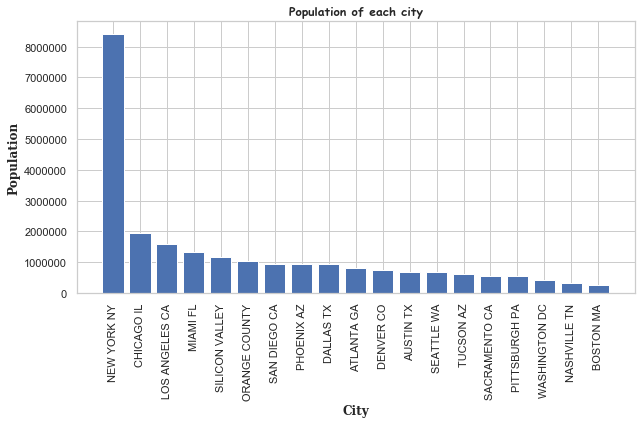

In [21]:
city_population=master_data.groupby(['city', 'population']).size().to_frame('size').reset_index().sort_values(['population'], ascending=[False])
print(city_population)

plt.figure(figsize=(10,5))
plt.bar(city_population.city,city_population.population )
plt.xticks(rotation=90)

plt.title("Population of each city", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Population", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("City", {"fontname": "serif", "fontweight":"bold"})
plt.xticks(rotation=90)
plt.show()

New York is the crowdest city.

See how many taxi users there are in each city.

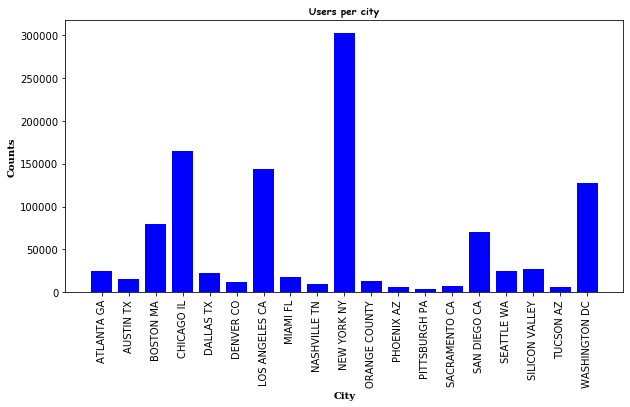

In [89]:
plt.figure(figsize=(10, 5))

plt.bar(master_data.city.unique(), master_data.groupby('city').users.mean(), color='b')

plt.title("Users per city", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Counts", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("City", {"fontname": "serif", "fontweight":"bold"})
plt.xticks(rotation=90)
plt.show()

The cities with the highest number of users are : New York, Washington DC, Los Angeles, Boston, Chicago, San Diego.

Check whether there are more men than women who travel by taxi or not.

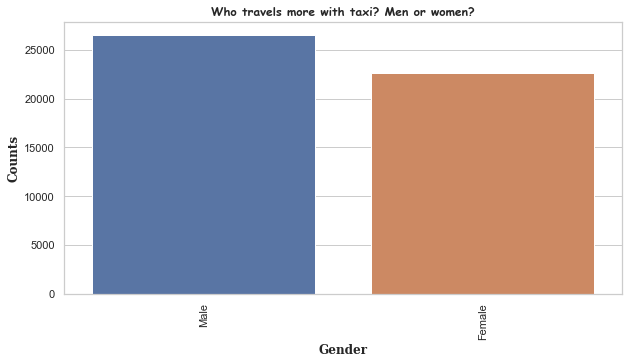

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(customer.gender)
plt.xticks(rotation=90)

plt.title("Who travels more with taxi? Men or women?", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Counts", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Gender", {"fontname": "serif", "fontweight":"bold"})
plt.xticks(rotation=90)
plt.show()

There are more men who travel by taxi than women.

See whether there is a preference for Yellow Cab when travelling by taxi around each city.

Text(0.5, 0, 'City')

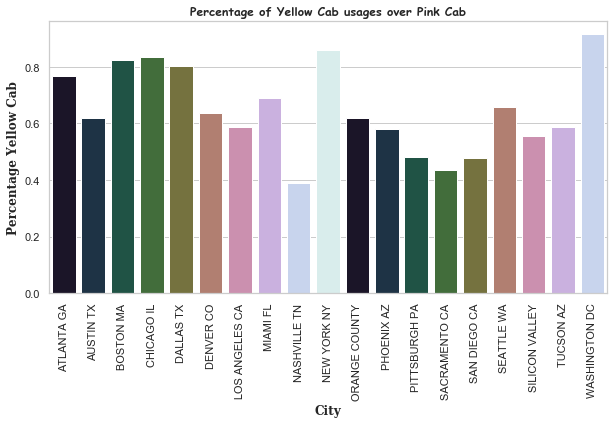

In [20]:
cities_males=master_data[master_data.company == 'Yellow Cab']['city'].value_counts()
cities_total=master_data['city'].value_counts()

cities=cities_males/cities_total

cities_df=pd.DataFrame(zip(cities.index, cities), columns = ["cities", "count"])
import seaborn as sns 

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="cities", y="count", data=cities_df, palette=sns.color_palette("cubehelix", 10))
plt.xticks(rotation=90)
plt.title("Percentage of Yellow Cab usages over Pink Cab", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Percentage Yellow Cab", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("City", {"fontname": "serif", "fontweight":"bold"})

According to the distribution of the two companies in every cities, in some cities, like New York, Washington DC, Boston, Chicago,Dallas the most poplar ones, the Yellow Cab is over 80% more preferable over Pink Cab. 
<br>On the other hand, in cities like Nashville, Sacramento, San Diego, Pink Cab is around 60% more preferable than Yellow Cab. <br> Yellow Cab seems to in the first place in cities distributions.

In [26]:
master_copy=master_data.copy()

See data dulicated by customer

In [27]:
master_copy[master_copy.duplicated(['customer_id'], keep=False)]

,Unnamed: 0,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users
0,0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
1,1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0
2,2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0
3,3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
4,4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,359387,10307228,3/3/2018,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859.0,127001.0
359388,359388,10319775,4/13/2018,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859.0,127001.0
359389,359389,10347676,7/6/2018,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859.0,127001.0
359390,359390,10358624,8/2/2018,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859.0,127001.0


See data after deleting duplicated customers

In [31]:
master_copy.drop_duplicates(subset=['customer_id'])

,Unnamed: 0,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users
0,0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
3,3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
7,7,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885.0,24701.0
11,11,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,814885.0,24701.0
15,15,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,814885.0,24701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359358,359358,10197277,7/23/2017,Pink Cab,WASHINGTON DC,32.64,375.27,368.8320,51510,Card,Female,18,6855,418859.0,127001.0
359369,359369,10199158,7/21/2017,Yellow Cab,WASHINGTON DC,2.02,26.13,24.9672,52759,Card,Female,58,2615,418859.0,127001.0
359376,359376,10201973,7/31/2017,Yellow Cab,WASHINGTON DC,17.25,225.16,215.2800,51078,Card,Male,21,8810,418859.0,127001.0
359383,359383,10274704,12/6/2017,Yellow Cab,WASHINGTON DC,42.80,627.21,559.8240,52614,Card,Female,44,8303,418859.0,127001.0


In [32]:
age=master_copy.groupby(['age',]).size().to_frame('size').reset_index()

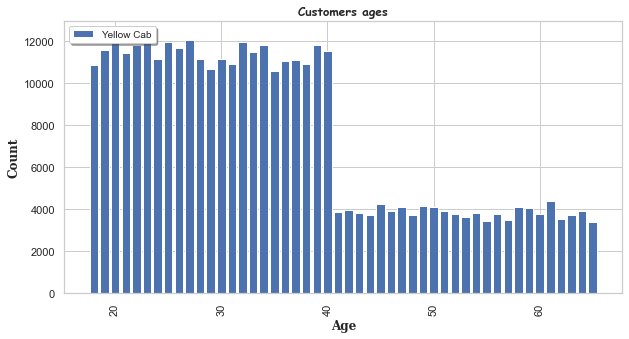

In [33]:
plt.figure(figsize=(10, 5))

plt.bar(age['age'], age['size'],  color='b')

plt.title("Customers ages", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Age", {"fontname": "serif", "fontweight":"bold"})
plt.xticks(rotation=90)
plt.legend(['Yellow Cab', 'Pink Cab'],  
           prop = {'size' : 10},  
           loc = 'upper left', shadow = True ) 
plt.show()

Most of the people are younger.

In [30]:
age_yellow = master_data[master_data.company == 'Yellow Cab']['age'].value_counts()
age_pink= master_data[master_data.company == 'Pink Cab']['age'].value_counts()

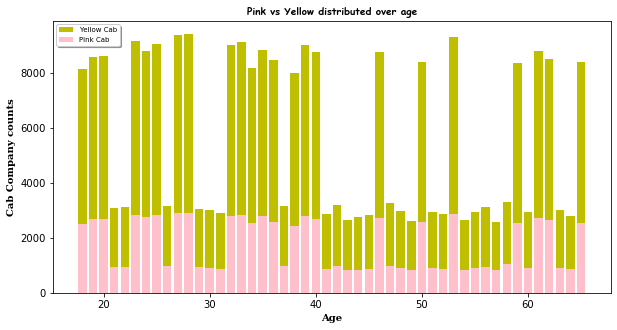

In [53]:
plt.figure(figsize=(10, 5))

plt.bar(master_data.age.unique(), age_yellow, color='y')
plt.bar(master_data.age.unique(), age_pink, color='pink')
plt.title("Pink vs Yellow distributed over age", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Cab Company counts", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Age", {"fontname": "serif", "fontweight":"bold"})
plt.legend(['Yellow Cab', 'Pink Cab'],  
           prop = {'size' : 7},  
           loc = 'upper left', shadow = True ) 
plt.show()

Yellow Cab is prefered by everyone, no matter the age.

In [34]:
master_data.groupby(['gender',])['income_(usd/month)'].mean()

gender
Female    15057.968954
Male      15042.005799
Name: income_(usd/month), dtype: float64

In [35]:
master_data.groupby(['city',])['income_(usd/month)'].mean()

city
ATLANTA GA        14933.150986
AUSTIN TX         14696.495711
BOSTON MA         15128.563317
CHICAGO IL        15101.718269
DALLAS TX         14846.508194
DENVER CO         14975.655163
LOS ANGELES CA    15064.550455
MIAMI FL          14984.887202
NASHVILLE TN      14734.359801
NEW YORK NY       15184.765801
ORANGE COUNTY     15188.944500
PHOENIX AZ        15012.038275
PITTSBURGH PA     14410.332064
SACRAMENTO CA     15268.225180
SAN DIEGO CA      15049.874854
SEATTLE WA        14840.748281
SILICON VALLEY    15248.547717
TUCSON AZ         14942.952356
WASHINGTON DC     14727.430162
Name: income_(usd/month), dtype: float64

Men and women have almost the same income. The income by city is also in the same range.

How many people pay in a certain range of prices?

In [6]:
master_copy=master_data.copy()

In [ ]:
master_copy['price_charged'] = pd.cut(master_copy.price_charged, bins=[i for i in range(0,2100,50)], labels=[i for i in range(41)])

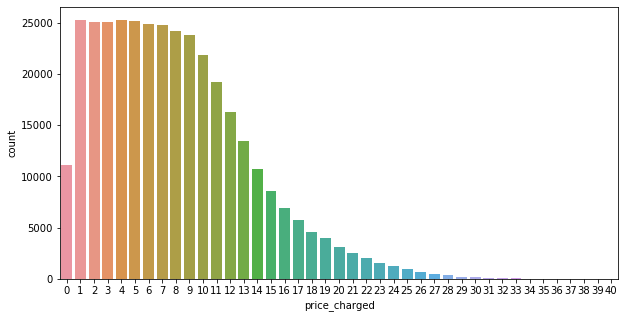

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(master_copy.price_charged)

There are around 250 000 people who pay  in the following ranges:50-100, 100-150, 150-200, 200-250, 250-300, 300-350, 350-400, 400-450, 450-500. The next intervals until 2000$ are fewer. What is above> 1100 can be considered outliers.

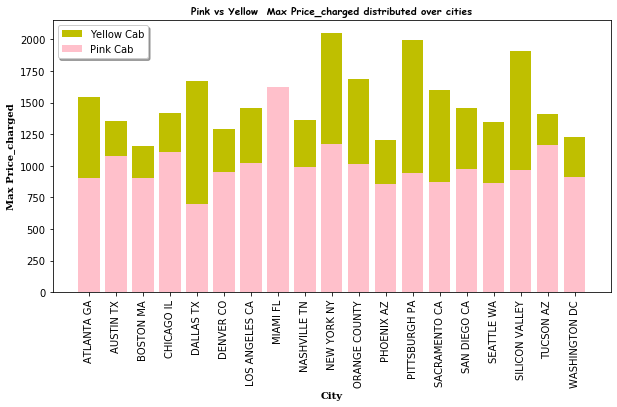

In [9]:
plt.figure(figsize=(10, 5))

plt.bar(master_data.city.unique(), master_data[master_data.company == 'Yellow Cab'].groupby('city')['price_charged'].max(), color='y')
plt.bar(master_data.city.unique(), master_data[master_data.company == 'Pink Cab'].groupby('city')['price_charged'].max(), color='pink')

plt.title("Pink vs Yellow  Max Price_charged distributed over cities", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Max Price_charged", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("City", {"fontname": "serif", "fontweight":"bold"})
plt.xticks(rotation=90)
plt.legend(['Yellow Cab', 'Pink Cab'],  
           prop = {'size' : 10},  
           loc = 'upper left', shadow = True ) 
plt.show()

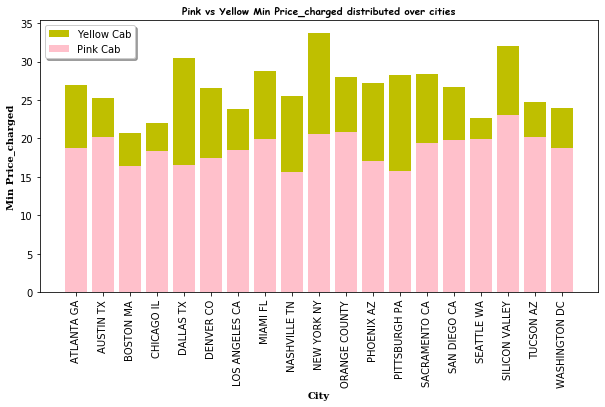

In [57]:
plt.figure(figsize=(10, 5))

plt.bar(master_data.city.unique(), master_data[master_data.company == 'Yellow Cab'].groupby('city')['price_charged'].min(), color='y')
plt.bar(master_data.city.unique(), master_data[master_data.company == 'Pink Cab'].groupby('city')['price_charged'].min(), color='pink')

plt.title("Pink vs Yellow Min Price_charged distributed over cities", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Min Price_charged", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("City", {"fontname": "serif", "fontweight":"bold"})
plt.xticks(rotation=90)
plt.legend(['Yellow Cab', 'Pink Cab'],  
           prop = {'size' : 10},  
           loc = 'upper left', shadow = True ) 
plt.show()

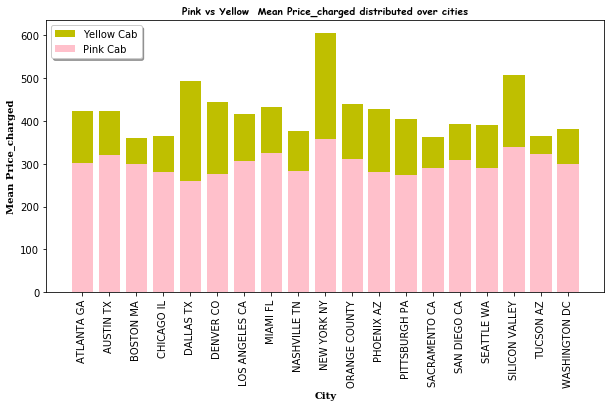

city
ATLANTA GA        22.248247
AUSTIN TX         22.512840
BOSTON MA         22.543649
CHICAGO IL        22.659493
DALLAS TX         22.599395
DENVER CO         22.444097
LOS ANGELES CA    22.688117
MIAMI FL          22.635606
NASHVILLE TN      22.968837
NEW YORK NY       22.496362
ORANGE COUNTY     22.364597
PHOENIX AZ        22.529450
PITTSBURGH PA     22.670523
SACRAMENTO CA     22.949719
SAN DIEGO CA      22.391995
SEATTLE WA        22.583783
SILICON VALLEY    22.696391
TUCSON AZ         22.267527
WASHINGTON DC     22.625514
Name: km_travelled, dtype: float64
city
ATLANTA GA        22.539824
AUSTIN TX         21.969176
BOSTON MA         22.740746
CHICAGO IL        22.511070
DALLAS TX         22.021203
DENVER CO         22.459218
LOS ANGELES CA    22.635629
MIAMI FL          22.299925
NASHVILLE TN      22.528066
NEW YORK NY       22.622415
ORANGE COUNTY     22.213153
PHOENIX AZ        21.747384
PITTSBURGH PA     22.581613
SACRAMENTO CA     22.604303
SAN DIEGO CA      22.554710
SEA

In [81]:
plt.figure(figsize=(10, 5))

plt.bar(master_data.city.unique(), master_data[master_data.company == 'Yellow Cab'].groupby('city')['price_charged'].mean(), color='y')
plt.bar(master_data.city.unique(), master_data[master_data.company == 'Pink Cab'].groupby('city')['price_charged'].mean(), color='pink')

plt.title("Pink vs Yellow  Mean Price_charged distributed over cities", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Mean Price_charged", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("City", {"fontname": "serif", "fontweight":"bold"})
plt.xticks(rotation=90)
plt.legend(['Yellow Cab', 'Pink Cab'],  
           prop = {'size' : 10},  
           loc = 'upper left', shadow = True ) 
plt.show()

print(master_data[master_data.company == 'Yellow Cab'].groupby('city')['km_travelled'].mean())
print(master_data[master_data.company == 'Pink Cab'].groupby('city')['km_travelled'].mean())


In every city, with both company the km_travelled mean is 22 km. The price for the same km_travelled in diffrenet cities, the price<br>is really different, even a significantly difference is noticed when using Yellow Cab company. 

company
Pink Cab      310.800856
Yellow Cab    458.181990
Name: price_charged, dtype: float64


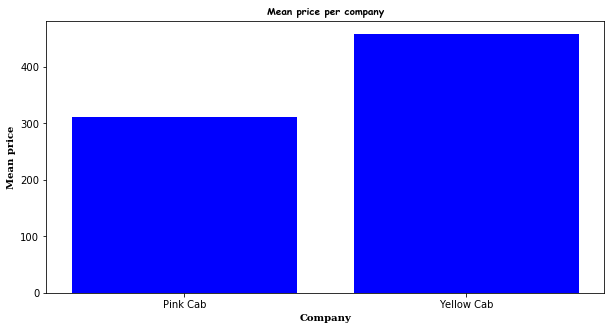

In [128]:
print(master_data.groupby('company')['price_charged'].mean())

plt.figure(figsize=(10, 5))

plt.bar(master_data.company.unique(), master_data.groupby('company')['price_charged'].mean(), color='b')

plt.title("Mean price per company", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Mean price", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Company", {"fontname": "serif", "fontweight":"bold"})
plt.show()

Yellow Cab is the most expensive company. New York, Sillicon Valley and Dallas seems to be the most expensive cities.

In [99]:
print(len(master_data.customer_id.unique()), 'customers')

46148 customers


In [33]:
master_data.groupby(['customer_id','company', ]).size().to_frame('size').reset_index()

,customer_id,company,size
0,1,Pink Cab,4
1,1,Yellow Cab,25
2,2,Pink Cab,4
3,2,Yellow Cab,36
4,3,Pink Cab,6
...,...,...,...
72221,59998,Yellow Cab,6
72222,59999,Pink Cab,2
72223,59999,Yellow Cab,6
72224,60000,Pink Cab,4


The same customer seems to travel with both companies. Same users seems to prefer Yellow Company making more travels using this company.

In [34]:
dd= master_data.groupby(['customer_id','company', ]).size().to_frame('size').reset_index()
dd.groupby('company').sum()

,customer_id,size
company,,
Pink Cab,831664558,84711
Yellow Cab,1049163053,274681


Yellow compan has the highest number of customers.

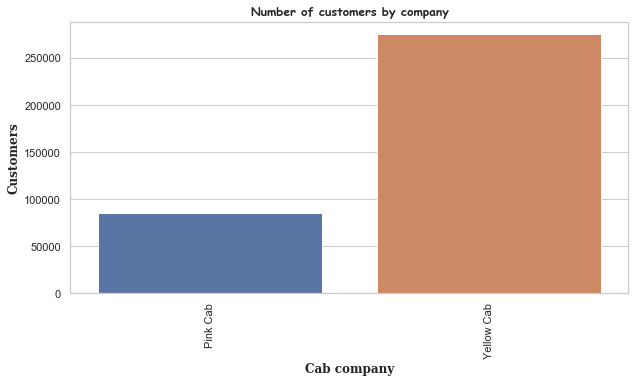

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(master_data.company)
plt.xticks(rotation=90)

plt.title("Number of customers by company", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Customers", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Cab company", {"fontname": "serif", "fontweight":"bold"})
plt.xticks(rotation=90)
plt.show()

The Yellow Compny is more used.

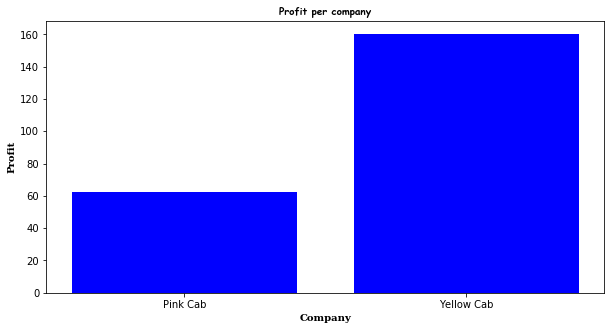

In [20]:
charged = master_data.groupby('company')['price_charged' ].mean()
real= master_data.groupby('company')['cost_of_trip' ].mean()

plt.figure(figsize=(10, 5))

plt.bar(master_data.company.unique(), charged- real, color='b')

plt.title("Profit per company", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Profit", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Company", {"fontname": "serif", "fontweight":"bold"})
plt.show()

Overall Yellow Company profit is higher than Pink Company's.

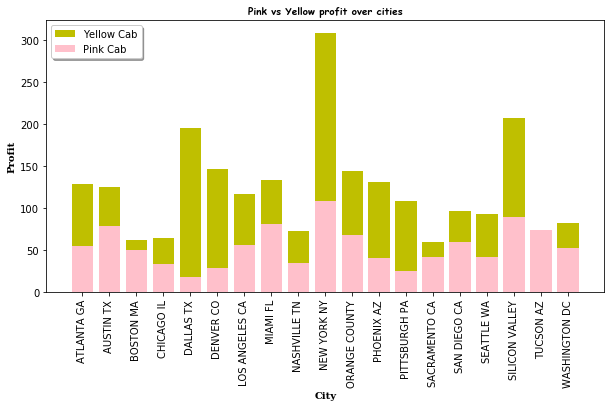

In [25]:
plt.figure(figsize=(10, 5))

charged_yellow=master_data[master_data.company == 'Yellow Cab'].groupby('city')['price_charged'].mean()
real_yellow=master_data[master_data.company == 'Yellow Cab'].groupby('city')['cost_of_trip'].mean()

charged_pink= master_data[master_data.company == 'Pink Cab'].groupby('city')['price_charged'].mean()
real_pink= master_data[master_data.company == 'Pink Cab'].groupby('city')['cost_of_trip'].mean()

plt.bar(master_data.city.unique(),charged_yellow - real_yellow, color='y')
plt.bar(master_data.city.unique(),charged_pink - real_pink, color='pink')

plt.title("Pink vs Yellow profit over cities", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Profit", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("City", {"fontname": "serif", "fontweight":"bold"})
plt.xticks(rotation=90)
plt.legend(['Yellow Cab', 'Pink Cab'],  
           prop = {'size' : 10},  
           loc = 'upper left', shadow = True ) 
plt.show()

From profit city analysis, there can be seen in detail which city from Yellow company brings the higher profit( New York, Dallas, Silicon Valley. These cities are also the most epxensive ones.

In [32]:
master_data.groupby([ 'customer_id','payment_mode',]).size().to_frame('size').reset_index()


,customer_id,payment_mode,size
0,1,Card,18
1,1,Cash,11
2,2,Card,25
3,2,Cash,15
4,3,Card,30
...,...,...,...
74653,59998,Cash,4
74654,59999,Card,4
74655,59999,Cash,4
74656,60000,Card,9


In [38]:
customer_paymont=master_data.groupby([ 'customer_id','payment_mode',]).size().to_frame('size').reset_index()
customer_paymont.groupby('payment_mode').sum()

,customer_id,size
payment_mode,,
Card,1067991248,215504
Cash,911316395,143888


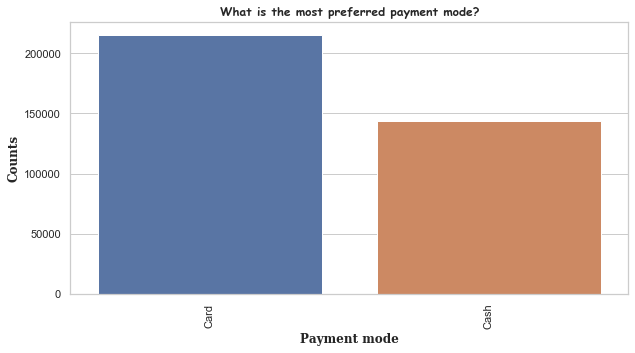

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(master_data.payment_mode)
plt.xticks(rotation=90)

plt.title("What is the most preferred payment mode?", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Counts", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Payment mode", {"fontname": "serif", "fontweight":"bold"})
plt.xticks(rotation=90)
plt.show()

Add profit column to master_data

In [14]:
master_data['profit'] = master_data['price_charged'] - master_data['cost_of_trip']

In [16]:
# master_data.to_csv('master_dataa.csv')

In [2]:
master_data=pd.read_csv("master_dataa.csv")
master_data.head()

,Unnamed: 0,Unnamed: 0.1,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users,profit
0,0,0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0,57.3150
1,1,1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0,281.2772
2,2,2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0,194.6480
3,3,3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0,23.6660
4,4,4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0,253.9808


In [23]:
master_data.shape

(359392, 17)

# Analysis over time

In [3]:
master_data['date_of_travel'] = pd.to_datetime(master_data['date_of_travel'])

In [17]:
master_data['date_of_travel'].min()

Timestamp('2016-01-02 00:00:00')

In [18]:
master_data['date_of_travel'].max()

Timestamp('2018-12-31 00:00:00')

Every year, how many customers had every company?
Every year, what was the mean price for each company?
Every year, what was the mean profit by company?

In [136]:
profit_year = master_data.groupby([master_data['date_of_travel'].dt.year, 'company'])['profit'].mean().to_frame().reset_index()

In [137]:
profit_year

,date_of_travel,company,profit
0,2016,Pink Cab,68.321819
1,2016,Yellow Cab,169.347821
2,2017,Pink Cab,67.070839
3,2017,Yellow Cab,168.817057
4,2018,Pink Cab,53.229689
5,2018,Yellow Cab,143.416122


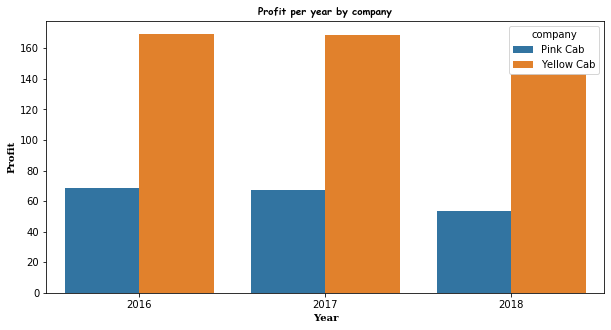

In [138]:
plt.figure(figsize=(10, 5))

sns.barplot(x = 'date_of_travel' , y= 'profit' , hue = 'company', data = profit_year)

plt.title("Profit per year by company", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Profit", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Year", {"fontname": "serif", "fontweight":"bold"})
plt.show()

In [143]:
price_year = master_data.groupby([master_data['date_of_travel'].dt.year, 'company'])['price_charged'].mean().to_frame().reset_index()

In [144]:
price_year

,date_of_travel,company,price_charged
0,2016,Pink Cab,315.330113
1,2016,Yellow Cab,467.918301
2,2017,Pink Cab,315.907442
3,2017,Yellow Cab,466.639950
4,2018,Pink Cab,301.642530
5,2018,Yellow Cab,440.875558


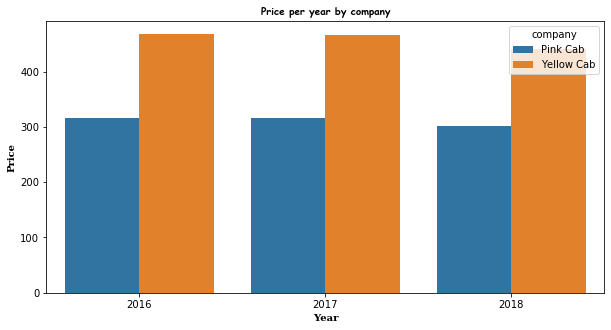

In [148]:
plt.figure(figsize=(10, 5))

sns.barplot(x = 'date_of_travel' , y= 'price_charged' , hue = 'company', data = price_year)

plt.title("Price per year by company", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Price", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Year", {"fontname": "serif", "fontweight":"bold"})
plt.show()

Along years, price and profit was in the same range, In 2018, it ws notices a decrease for both companies.<br>
Yellow Company has brought the highest profit along years.

In [153]:
customer_year = master_data.groupby([master_data['date_of_travel'].dt.year, 'company'])['customer_id'].count().to_frame().reset_index()

In [154]:
customer_year

,date_of_travel,company,customer_id
0,2016,Pink Cab,25080
1,2016,Yellow Cab,82239
2,2017,Pink Cab,30321
3,2017,Yellow Cab,98189
4,2018,Pink Cab,29310
5,2018,Yellow Cab,94253


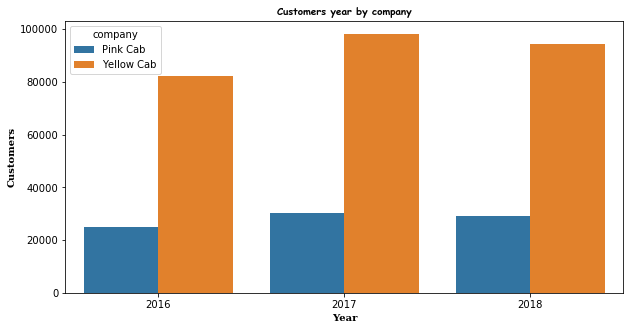

In [199]:
plt.figure(figsize=(10, 5))

sns.barplot(x = 'date_of_travel' , y= 'customer_id' , hue = 'company', data = customer_year)

plt.title("Customers year by company", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Customers", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Year", {"fontname": "serif", "fontweight":"bold"})
plt.show()

Along years Yellow Company has the highest number of customers.

In [4]:
def create_data_model(company, col_interest):
    data = master_data.copy()
    data = data[data.company == company]
    cols = [i for i in data.columns if i!= col_interest and i!= 'date_of_travel']
    data.drop(cols, axis=1, inplace=True)
    data.reset_index()
    data =data.sort_values('date_of_travel')
    print(data.isnull().sum())
    data.set_index('date_of_travel', inplace = True)
    print(data.index)
    data_month = data[col_interest].resample('MS').mean()
    return data, data_month

In [100]:
master_profit_yellow, profi_month_y = create_data_model('Yellow Cab','profit')
master_profit_yellow.head()

date_of_travel    0
profit            0
dtype: int64
DatetimeIndex(['2016-01-02', '2016-01-02', '2016-01-02', '2016-01-02',
               '2016-01-02', '2016-01-02', '2016-01-02', '2016-01-02',
               '2016-01-02', '2016-01-02',
               ...
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='date_of_travel', length=274681, freq=None)


,profit
date_of_travel,
2016-01-02,730.5484
2016-01-02,483.5548
2016-01-02,130.0600
2016-01-02,303.6520
2016-01-02,684.1320


In [101]:
master_profit_p,  profi_month_p = create_data_model('Pink Cab','profit')
master_profit_p.head()

date_of_travel    0
profit            0
dtype: int64
DatetimeIndex(['2016-01-02', '2016-01-02', '2016-01-02', '2016-01-02',
               '2016-01-02', '2016-01-02', '2016-01-02', '2016-01-02',
               '2016-01-02', '2016-01-02',
               ...
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='date_of_travel', length=84711, freq=None)


,profit
date_of_travel,
2016-01-02,413.234
2016-01-02,98.006
2016-01-02,191.760
2016-01-02,36.170
2016-01-02,22.730


In [102]:
profi_month_y['2016':]

date_of_travel
2016-01-01    224.874458
2016-02-01    215.911248
2016-03-01    177.762298
2016-04-01    176.517989
2016-05-01    214.977948
2016-06-01    220.732655
2016-07-01    150.389628
2016-08-01    122.885222
2016-09-01    162.714973
2016-10-01    141.616868
2016-11-01    154.507196
2016-12-01    154.792475
2017-01-01    195.499408
2017-02-01    204.913173
2017-03-01    199.873510
2017-04-01    191.612594
2017-05-01    229.327386
2017-06-01    182.294187
2017-07-01    139.943610
2017-08-01    132.616682
2017-09-01    161.328947
2017-10-01    147.760476
2017-11-01    157.234715
2017-12-01    150.431763
2018-01-01    158.657407
2018-02-01    177.323424
2018-03-01    163.987571
2018-04-01    161.674850
2018-05-01    192.701105
2018-06-01    171.436095
2018-07-01    116.462715
2018-08-01    107.815576
2018-09-01    133.217173
2018-10-01    130.950576
2018-11-01    126.173938
2018-12-01    133.170695
Freq: MS, Name: profit, dtype: float64

In [5]:
def plot_evolution_company(data_month_y, data_month_p, title, x, y):
    data_month_y.plot(figsize=(15, 6), color='yellow')
    data_month_p.plot(color='pink')

    plt.title(title, {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
    plt.ylabel(x, {"fontname": "serif", "fontweight":"bold"})
    plt.xlabel(y, {"fontname": "serif", "fontweight":"bold"})
    plt.xticks(rotation=90)
    plt.show()

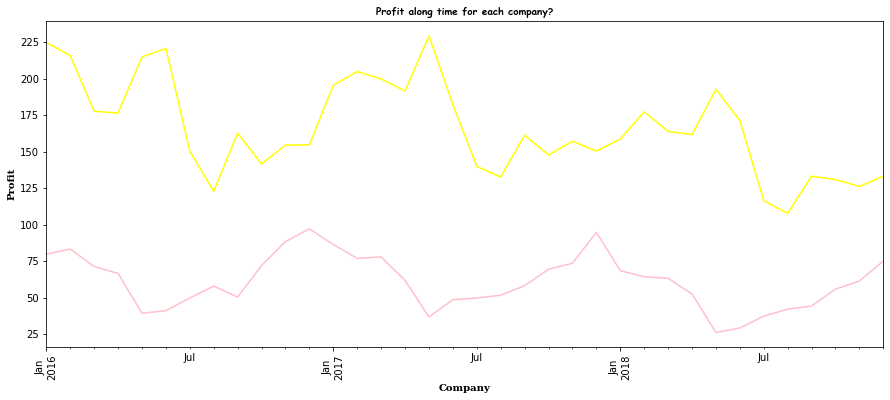

In [109]:
title = "Profit along time for each company?"
x = "Profit"
y = "Company"
plot_evolution_company(profi_month_y, profi_month_p, title, x, y )

It is obviously that no matter the time, Yellow Company has the highest profit.

In [6]:
def plot_trends(data_month):
    from pylab import rcParams
    import statsmodels.api as sm
    rcParams['figure.figsize'] = 18, 8
    decomposition = sm.tsa.seasonal_decompose(data_month, model='additive')
    decomposition.plot()
    plt.show()
    

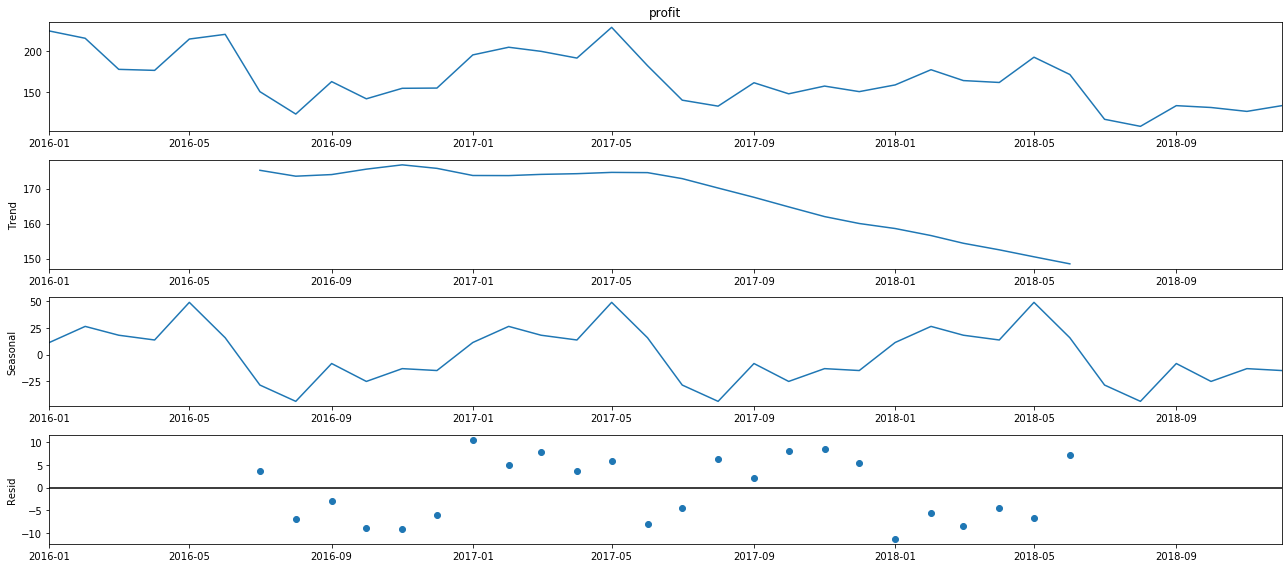

In [113]:
plot_trends(profi_month_y)

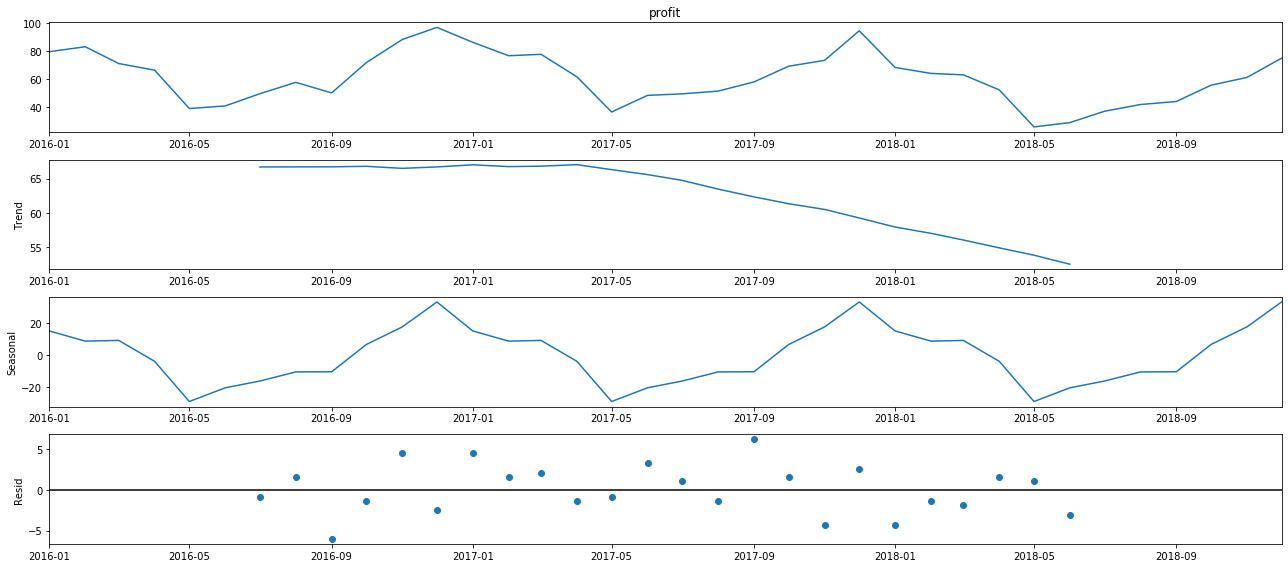

In [114]:
plot_trends(profi_month_p)

We may notice that on May time, every year,  Yellow Company has the highest profit. <br>
On the other hand, on May time, every year, Pink Company has the lowest profit.<br>
Pink Company seems to have the higher profit during winter holidays.<br>
Yellow Company have the lowest profit during end of summer.

Starting from 2017 May, to the summer of 2018, there was a tendency of profit decreasing for both companies.

# Modelling

p,d,q are parameters for seasonality, trend, and noise in data. 
<br>

In [7]:
def create_parameters():
    import itertools
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    print(pdq)
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]
    print('Examples of parameter combinations for Seasonal ARIMA...')
    print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
    print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
    print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
    print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
    
    return pdq, seasonal_pdq

In [139]:
pdq, seasonal_pdq = create_parameters()

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Using “grid search” helps finding best parameters in order to obtain best performance of the model.

In [8]:
def find_best_param(pdq, seasonal_pdq, data_month):
    min_ = 1000000000
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(data_month,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                if results.aic < min_:
                    min_= results.aic
                    p = param
                    p_s = param_seasonal
                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                
            except:
                continue
    print(min_)
    return p, p_s

#Model profit for Yellow Company

In [164]:
p, p_s = find_best_param(pdq, seasonal_pdq, profi_month_y)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:459.7737052562085
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:291.3949623235287
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:211.29132164578746
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:106.91648386337772
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:209.57859983675846
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:195.5371359322138
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:117.84181811130443
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:108.7957148519181
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:410.6515004465311
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:256.6060360108945
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:197.0418911183173
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:92.71601733070823
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:206.40958837241172
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:193.73356293193615
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:112.87493968095609
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:93.8573057535124
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:323.1278772071895
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:196.58127110265715
ARI

The lowest value of Aic is 56.66686775622871

In [9]:
def create_model(data_month, p, p_s):
    mod = sm.tsa.statespace.SARIMAX(data_month,
                                order= p,
                                seasonal_order= p_s,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    print(results.summary().tables[1])
    return results
    

In [168]:
results_model = create_model (profi_month_y, p, p_s)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8730      0.578     -1.509      0.131      -2.007       0.261
ma.L1         -0.5411      0.156     -3.462      0.001      -0.847      -0.235
ma.S.L12      -0.3827      0.114     -3.344      0.001      -0.607      -0.158
sigma2        12.5176      8.554      1.463      0.143      -4.247      29.282


In [10]:
def pred_plot_predicted_actual(results, data_month,  title, y ):
    pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
    pred_ci = pred.conf_int()
    ax = data_month['2016':].plot(label='actual')
    pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel(y)
    plt.legend()
    plt.show()
    return pred

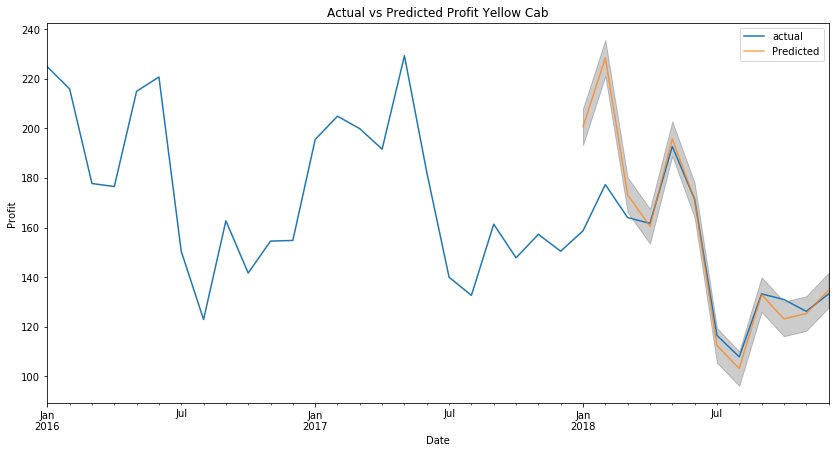

In [177]:
predictions = pred_plot_predicted_actual( results_model, profi_month_y, 'Actual vs Predicted Profit Yellow Cab', 'Profit')

In [11]:
def forecast( predictions, data_month, results_model, title, y):
    y_forecasted = predictions.predicted_mean
    y_truth = data_month['2018-01-01':]
    mse = ((y_forecasted - y_truth) ** 2).mean()
    print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
    print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
    pred_uc = results_model.get_forecast(steps=40)
    pred_ci = pred_uc.conf_int()
    ax = data_month.plot(label='actual', figsize=(14, 7))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=0.25)
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel(y)
    plt.legend()
    plt.show()

The Mean Squared Error of our forecasts is 380.64
The Root Mean Squared Error of our forecasts is 19.51


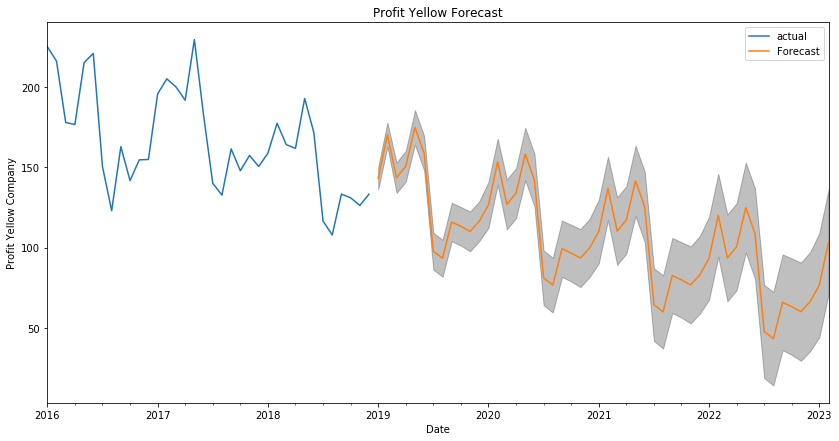

In [189]:
forecast( predictions, profi_month_y, results_model,"Profit Yellow Forecast", 'Profit Yellow Company')

#Model profit for Pink Company

In [207]:
p, p_s = find_best_param(pdq, seasonal_pdq, profi_month_p)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:391.63154669212554
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:246.08439641028608
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:178.7418659401974
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:92.83936869631465
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:172.39859894828925
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:155.8920915196736
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:101.75557188668276
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:94.79807776916795
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:346.74828673276284
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:216.31254855005608
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:165.79963485303236
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:79.62277984002499
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:171.8743941321811
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:150.53901445446675
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:92.74982666983496
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:78.03125458211544
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:273.01892391360155
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:169.9069512169851
A

In [208]:
results_model = create_model (profi_month_p, p, p_s)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0507      0.343      0.148      0.882      -0.622       0.723
ma.S.L12      -0.5478      0.227     -2.409      0.016      -0.994      -0.102
sigma2         7.4994      5.342      1.404      0.160      -2.970      17.969


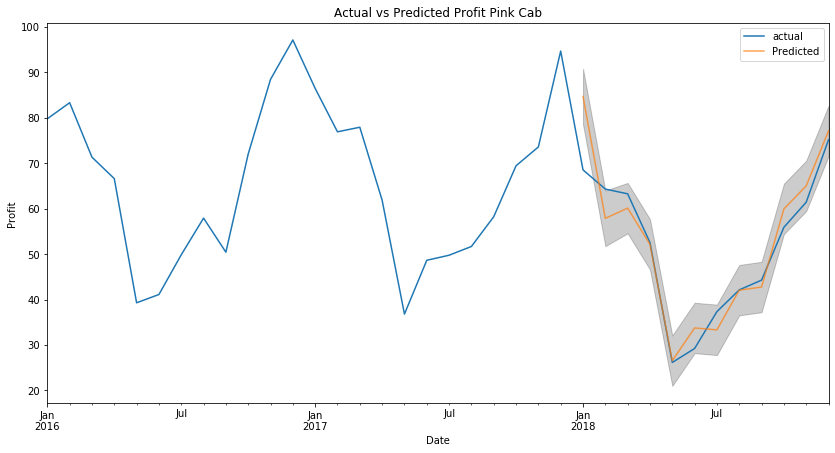

In [211]:
predictions = pred_plot_predicted_actual( results_model, profi_month_p,'Actual vs Predicted Profit Pink Cab', 'Profit')

The Mean Squared Error of our forecasts is 10037.86
The Root Mean Squared Error of our forecasts is 100.19


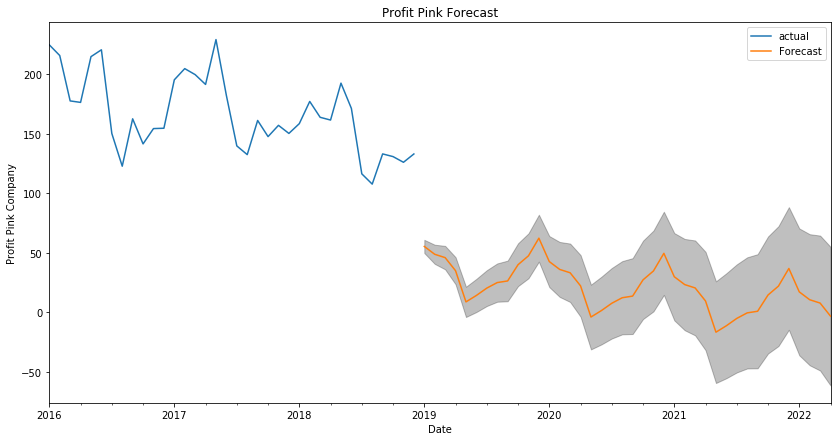

In [212]:
forecast( predictions, profi_month_y, results_model,"Profit Pink Forecast", 'Profit Pink Company')

Considering the forecast plots above for both companies, the profit for both companies tend to decrease in the following
years, but the rate is different. It would not be so much loss considering Yellow Company.

In [44]:
master_data=pd.read_csv("master_dataa.csv")
master_data.head()
master_data['date_of_travel'] = pd.to_datetime(master_data['date_of_travel'])

In [45]:
master_y = master_data[master_data.company == 'Yellow Cab']

In [46]:
customer_y = master_y['date_of_travel'].groupby(master_y.date_of_travel.dt.to_period("M")).agg('count')

In [47]:
master_p = master_data[master_data.company == 'Pink Cab']

In [48]:
customer_p = master_p['date_of_travel'].groupby(master_p.date_of_travel.dt.to_period("M")).agg('count')

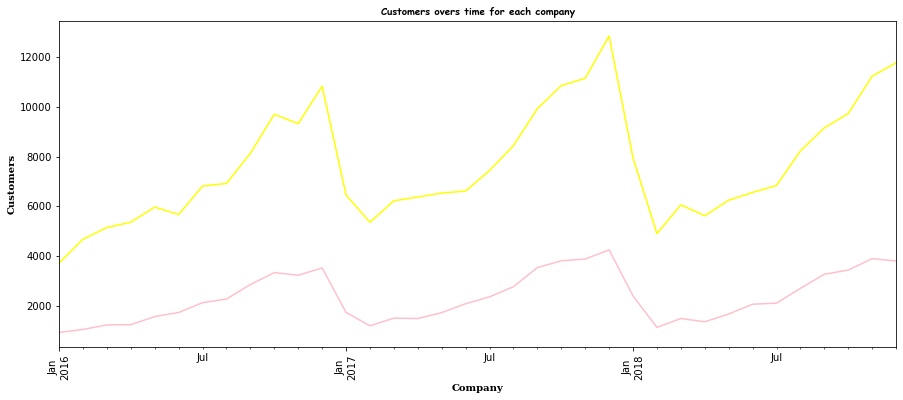

In [49]:
title = "Customers overs time for each company"
x = "Customers"
y = "Company"
plot_evolution_company(customer_y, customer_p, title, x, y )

Because error was met,seasonal_decompose does not accept PeriodIndex, a solution was to convertthe index to DatetimeIndex.

In [50]:
customer_y.index = customer_y.index.to_timestamp()

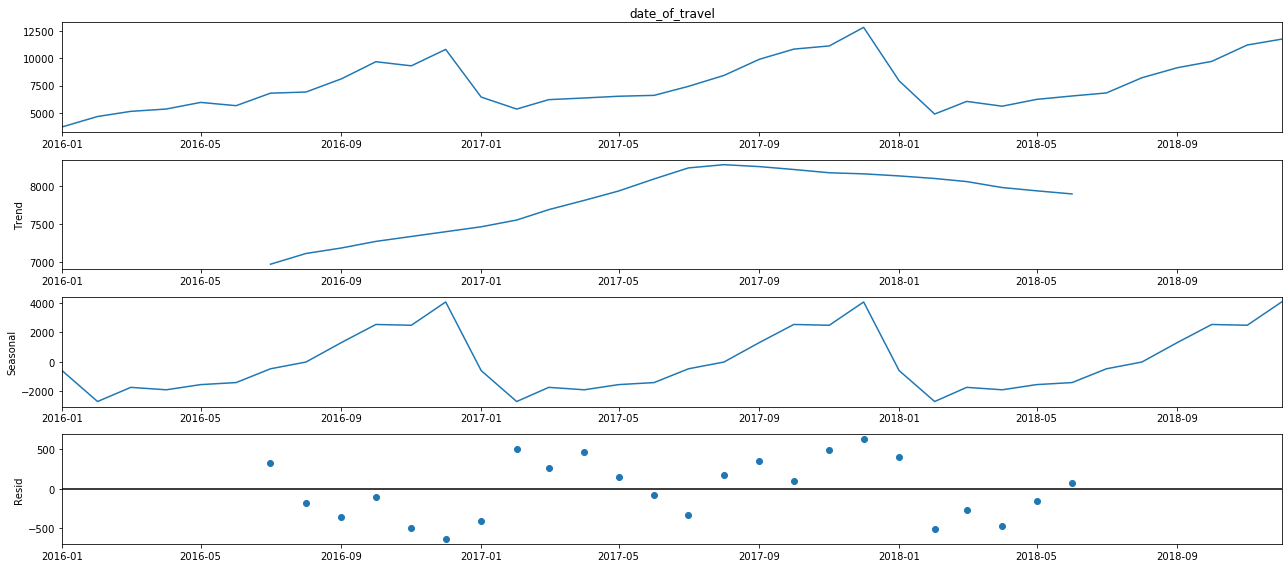

In [51]:
plot_trends(customer_y)

In [52]:
customer_p.index = customer_p.index.to_timestamp()

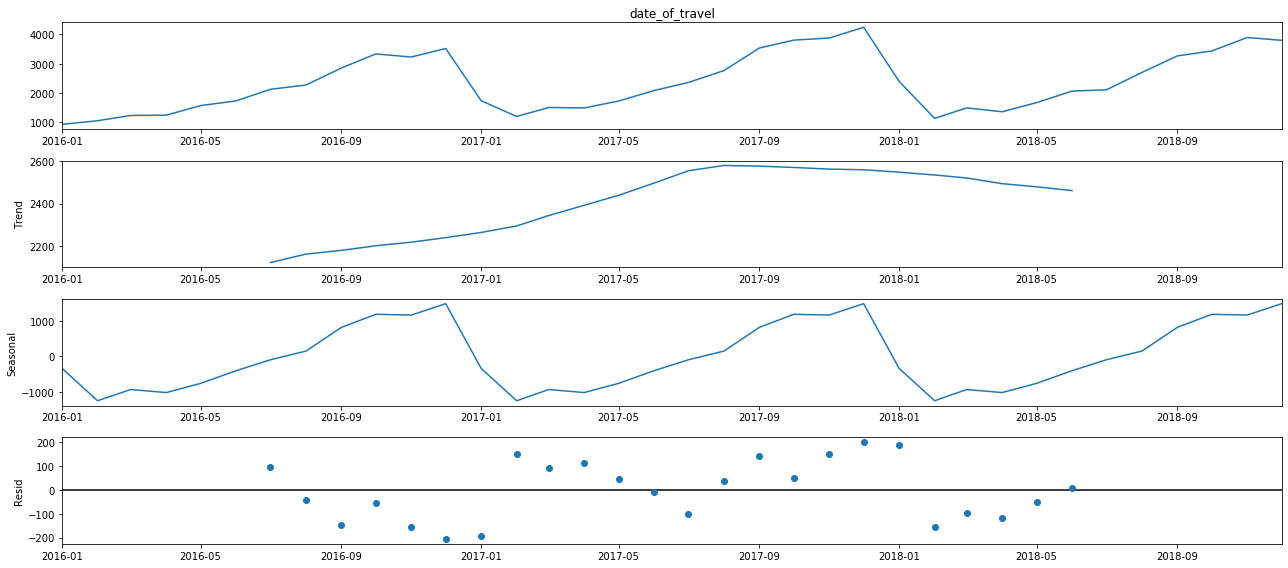

In [53]:
plot_trends(customer_p)

In [54]:
pdq, seasonal_pdq = create_parameters()

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [67]:
p, p_s = find_best_param(pdq, seasonal_pdq, customer_y)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:730.8403546205174
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:456.8502793809209
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:387.0074482069977
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:166.6670466865076
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:408.2319342651384
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:355.5434242671369
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:196.0207962287865
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:168.3627062042094
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:689.1449385769222
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:416.44524909997494
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:361.2365252385913
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:150.68183122505658
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:394.0153348549633
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:339.8918271710376
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:195.1657788185601
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:152.6251612156157
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:596.5789118338648
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:367.8163179427404
ARIMA(0,

In [68]:
results_model = create_model (customer_y, p, p_s)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4467      0.249     -1.792      0.073      -0.935       0.042
ma.S.L12       1.1057     10.139      0.109      0.913     -18.767      20.978
sigma2      2.012e+05   2.16e+06      0.093      0.926   -4.03e+06    4.43e+06


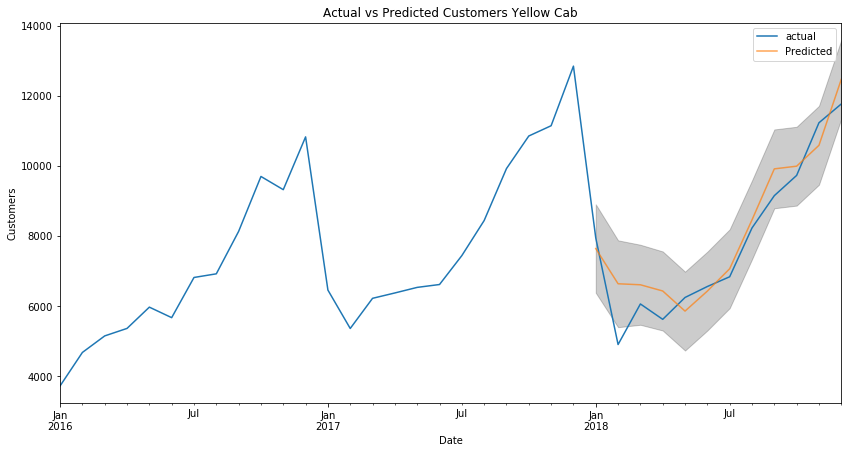

In [69]:
predictions = pred_plot_predicted_actual( results_model, customer_y,'Actual vs Predicted Customers Yellow Cab', 'Customers')

Number of customers is lowest near the end of each year.

The Mean Squared Error of our forecasts is 490900.4
The Root Mean Squared Error of our forecasts is 700.64


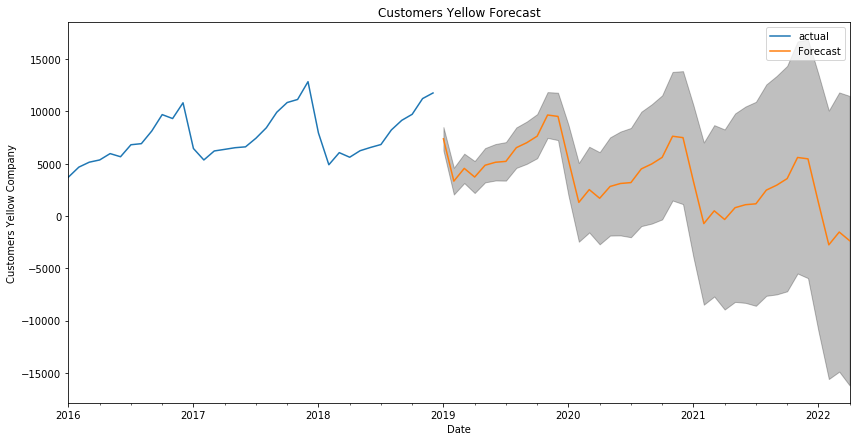

In [71]:
forecast( predictions, customer_y, results_model,"Customers Yellow Forecast", 'Customers Yellow Company')

In [60]:
p, p_s = find_best_param(pdq, seasonal_pdq, customer_p)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:651.2033852604075
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:405.11948878076174
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:339.56841623675734
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:143.10577070221262
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:356.93501824430837
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:338.18844206481924
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:172.93707469130155
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:144.67699928302827
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:594.718304362728
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:366.547894677259
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:316.5223640188489
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:130.2508486687993
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:347.9888875382592
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:313.5540543261481
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:172.30120579270687
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:132.24781899594228
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:533.3119719350453
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:337.8082058691196
ARI

In [61]:
results_model = create_model (customer_p, p, p_s)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9095      0.503     -1.808      0.071      -1.896       0.077
ma.L1         -0.1007      0.242     -0.416      0.678      -0.576       0.374
ma.S.L12      -0.1861      1.183     -0.157      0.875      -2.504       2.132
sigma2      2.513e+04    1.9e+04      1.324      0.185   -1.21e+04    6.23e+04


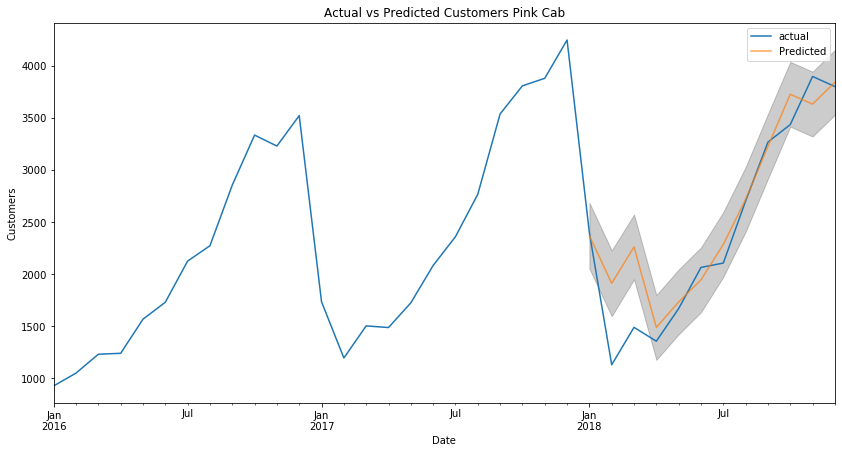

In [63]:
predictions = pred_plot_predicted_actual( results_model, customer_p,'Actual vs Predicted Customers Pink Cab', 'Customers')

Number of customers is lowest near the end of the each year.

The Mean Squared Error of our forecasts is 119440.14
The Root Mean Squared Error of our forecasts is 345.6


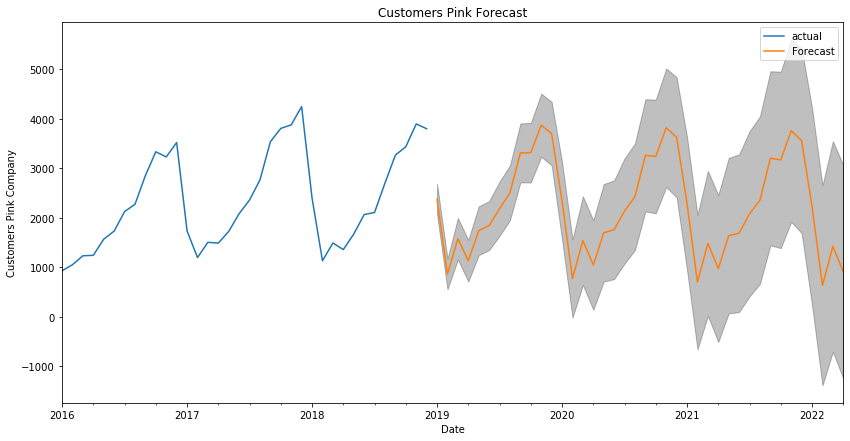

In [64]:
forecast( predictions, customer_p, results_model,"Customers Pink Forecast", 'Customers Pink Company')

# Recommendation

Yellow Company because:
 - it is mostly used no matter the season 
 - it has the higher profit
 - it is preferred by everyone, no matter the age
 - it has great popularity along most of the cities